In [35]:
%run DANN.py
%run abow.py

In [23]:
data = pd.read_csv('osteo_cal_sodium_decile.csv') 
data.shape

(61022, 201)

In [38]:
abow_sex= A_BOW(x_dim= 118,
            z_dim = 1,
            h1=150, h2=50,
             z_inv_factor = 1,
             loss_weights = {"y":1, "z":1}, 
            learning_rate = 0.001)

F    53852
M     7170
Name: sex, dtype: int64
0    53852
1     7170
Name: sex_cat, dtype: int64 

white     36438
black     17256
others     7328
Name: Race_Cat_combine, dtype: int64
2    36438
0    17256
1     7328
Name: race, dtype: int64 

from_50_to_70    25908
from_70_to_80    14712
more_than_80     12154
from_30_to_50     7264
less_than_30       984
Name: Age_combine, dtype: int64
1    25908
2    14712
4    12154
0     7264
3      984
Name: age, dtype: int64 

OHE shape:  (61022, 123) 

Cols: Index(['sex_cat', 'Strata', 'osteo_predict', 'Alcohol_Prior', 'Tobacco_Prior',
       'Drug_antipsych_prior', 'Drug_Estrogens_prior',
       'Drug_Glucocorticoids_prior', 'Drug_Nsaids_prior', 'Drug_Opiates_prior',
       ...
       'sex_cat_0', 'sex_cat_1', 'race_0', 'race_1', 'race_2', 'age_0',
       'age_1', 'age_2', 'age_3', 'age_4'],
      dtype='object', length=123)

+++++++++++++++++++++++++++++++++++++++++++


==================== wait for me..... ==================


===============

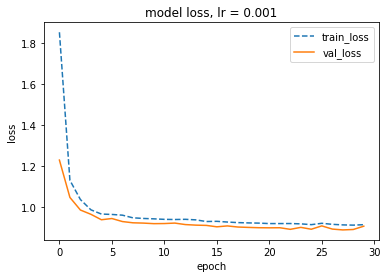

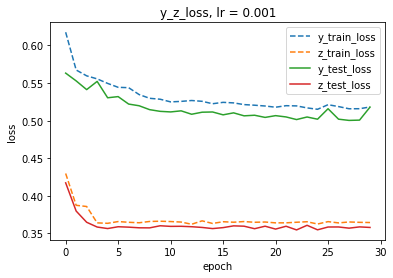

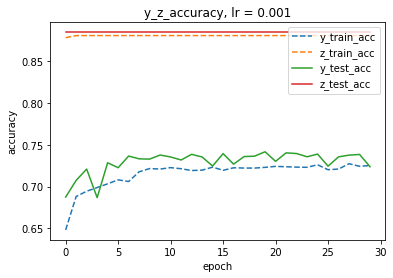

classification_report of whole model: 
               precision    recall  f1-score   support

           0       0.68      0.88      0.77     30511
           1       0.83      0.58      0.68     30511

    accuracy                           0.73     61022
   macro avg       0.76      0.73      0.73     61022
weighted avg       0.76      0.73      0.73     61022
 

confusion_matrix of whole model: 
 [[26935  3576]
 [12778 17733]] 

AUC of whole model:  0.731998295696634

+++++++++++++++++++++++++++++++++++++++++++

subgroups: 
 0    53852
1     7170
Name: sex_cat, dtype: int64


sex_cat_0
              precision    recall  f1-score   support

           0       0.68      0.88      0.77     26926
           1       0.83      0.58      0.68     26926

    accuracy                           0.73     53852
   macro avg       0.75      0.73      0.72     53852
weighted avg       0.75      0.73      0.72     53852

[[23750  3176]
 [11302 15624]]
AUC of:  sex_cat_0 0.7311520463492536
-------

In [40]:
DANN_TRAIN_TOGETHER(data, abow_sex, "sex_cat", 30, 0.001)

In [17]:
rename = CONFOUNDING_RENAME(data)
extract = FILTER_DATA(rename)
osteo= CONVERT_STRING_FLOAT(extract)

ohe_data = OHE(osteo, 'sex_cat')

F    53852
M     7170
Name: sex, dtype: int64
0    53852
1     7170
Name: sex_cat, dtype: int64 

white     36438
black     17256
others     7328
Name: Race_Cat_combine, dtype: int64
2    36438
0    17256
1     7328
Name: race, dtype: int64 

from_50_to_70    25908
from_70_to_80    14712
more_than_80     12154
from_30_to_50     7264
less_than_30       984
Name: Age_combine, dtype: int64
1    25908
2    14712
4    12154
0     7264
3      984
Name: age, dtype: int64 

OHE shape:  (61022, 123) 

Cols: Index(['sex_cat', 'Strata', 'osteo_predict', 'Alcohol_Prior', 'Tobacco_Prior',
       'Drug_antipsych_prior', 'Drug_Estrogens_prior',
       'Drug_Glucocorticoids_prior', 'Drug_Nsaids_prior', 'Drug_Opiates_prior',
       ...
       'sex_cat_0', 'sex_cat_1', 'race_0', 'race_1', 'race_2', 'age_0',
       'age_1', 'age_2', 'age_3', 'age_4'],
      dtype='object', length=123)


dict_keys(['val_loss', 'val_y_loss', 'val_z_loss', 'val_y_accuracy', 'val_z_accuracy', 'loss', 'y_loss', 'z_loss', 'y_accuracy', 'z_accuracy'])


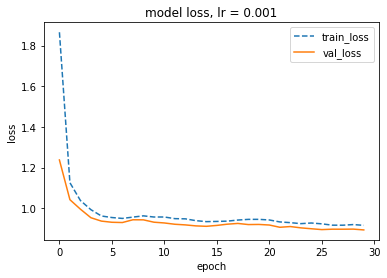

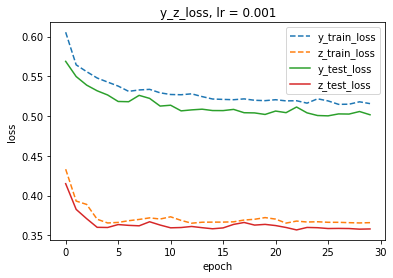

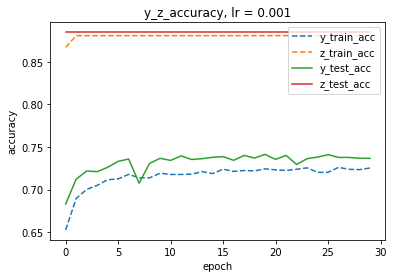

classification_report of whole model: 
               precision    recall  f1-score   support

           0       0.70      0.82      0.76     30511
           1       0.79      0.65      0.71     30511

    accuracy                           0.74     61022
   macro avg       0.74      0.74      0.74     61022
weighted avg       0.74      0.74      0.74     61022
 

confusion_matrix of whole model: 
 [[25083  5428]
 [10568 19943]] 

AUC of whole model:  0.7378650322834388


In [10]:
TRAIN_MODEL(abow_sex, 'sex_cat', 30, '0.001')

## RACE

F    53852
M     7170
Name: sex, dtype: int64
0    53852
1     7170
Name: sex_cat, dtype: int64 

white     36438
black     17256
others     7328
Name: Race_Cat_combine, dtype: int64
2    36438
0    17256
1     7328
Name: race, dtype: int64 

from_50_to_70    25908
from_70_to_80    14712
more_than_80     12154
from_30_to_50     7264
less_than_30       984
Name: Age_combine, dtype: int64
1    25908
2    14712
4    12154
0     7264
3      984
Name: age, dtype: int64 

OHE shape:  (61022, 123) 

Cols: Index(['race', 'Strata', 'osteo_predict', 'Alcohol_Prior', 'Tobacco_Prior',
       'Drug_antipsych_prior', 'Drug_Estrogens_prior',
       'Drug_Glucocorticoids_prior', 'Drug_Nsaids_prior', 'Drug_Opiates_prior',
       ...
       'sex_cat_0', 'sex_cat_1', 'race_0', 'race_1', 'race_2', 'age_0',
       'age_1', 'age_2', 'age_3', 'age_4'],
      dtype='object', length=123)

+++++++++++++++++++++++++++++++++++++++++++


==================== wait for me..... ==================


==================

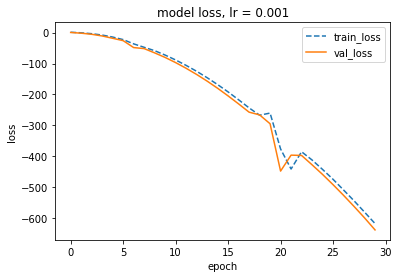

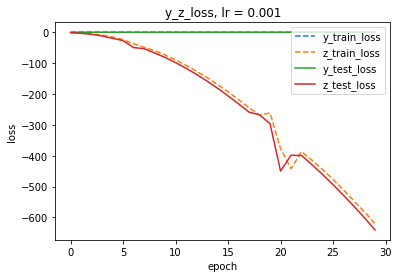

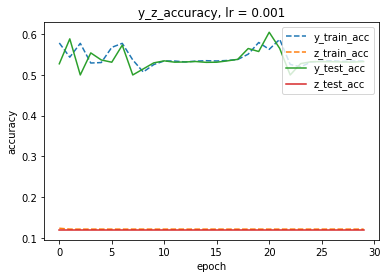

classification_report of whole model: 
               precision    recall  f1-score   support

           0       0.52      0.39      0.45     30511
           1       0.51      0.64      0.57     30511

    accuracy                           0.52     61022
   macro avg       0.52      0.52      0.51     61022
weighted avg       0.52      0.52      0.51     61022
 

confusion_matrix of whole model: 
 [[11966 18545]
 [10961 19550]] 

AUC of whole model:  0.5164694700272033

+++++++++++++++++++++++++++++++++++++++++++

subgroups: 
 0    53852
1     7170
Name: sex_cat, dtype: int64


sex_cat_0
              precision    recall  f1-score   support

           0       0.52      0.39      0.44     26926
           1       0.51      0.65      0.57     26926

    accuracy                           0.52     53852
   macro avg       0.52      0.52      0.51     53852
weighted avg       0.52      0.52      0.51     53852

[[10390 16536]
 [ 9459 17467]]
AUC of:  sex_cat_0 0.5172881230037882
------

In [36]:
abow_race = A_BOW(x_dim= 117,
            z_dim = 1,
            h1=150, h2=50,
             z_inv_factor = 1,
             loss_weights = {"y":1, "z":1},
            learning_rate = 0.001)
DANN_TRAIN_TOGETHER(data, abow_race, "race", 30, 0.001)

### AGE

F    53852
M     7170
Name: sex, dtype: int64
0    53852
1     7170
Name: sex_cat, dtype: int64 

white     36438
black     17256
others     7328
Name: Race_Cat_combine, dtype: int64
2    36438
0    17256
1     7328
Name: race, dtype: int64 

from_50_to_70    25908
from_70_to_80    14712
more_than_80     12154
from_30_to_50     7264
less_than_30       984
Name: Age_combine, dtype: int64
1    25908
2    14712
4    12154
0     7264
3      984
Name: age, dtype: int64 

OHE shape:  (61022, 123) 

Cols: Index(['age', 'Strata', 'osteo_predict', 'Alcohol_Prior', 'Tobacco_Prior',
       'Drug_antipsych_prior', 'Drug_Estrogens_prior',
       'Drug_Glucocorticoids_prior', 'Drug_Nsaids_prior', 'Drug_Opiates_prior',
       ...
       'sex_cat_0', 'sex_cat_1', 'race_0', 'race_1', 'race_2', 'age_0',
       'age_1', 'age_2', 'age_3', 'age_4'],
      dtype='object', length=123)

+++++++++++++++++++++++++++++++++++++++++++


==================== wait for me..... ==================


===================

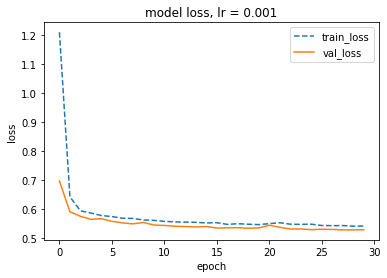

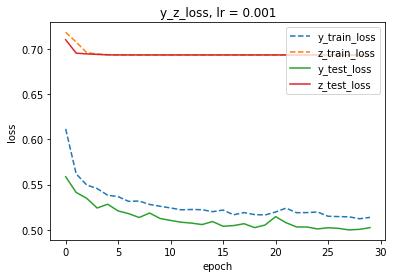

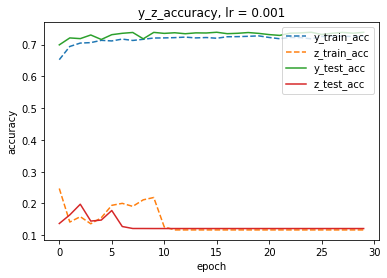

classification_report of whole model: 
               precision    recall  f1-score   support

           0       0.71      0.81      0.76     30511
           1       0.78      0.67      0.72     30511

    accuracy                           0.74     61022
   macro avg       0.74      0.74      0.74     61022
weighted avg       0.74      0.74      0.74     61022
 

confusion_matrix of whole model: 
 [[24714  5797]
 [10125 20386]] 

AUC of whole model:  0.7390777096784766

+++++++++++++++++++++++++++++++++++++++++++

subgroups: 
 0    53852
1     7170
Name: sex_cat, dtype: int64


sex_cat_0
              precision    recall  f1-score   support

           0       0.71      0.81      0.76     26926
           1       0.78      0.67      0.72     26926

    accuracy                           0.74     53852
   macro avg       0.74      0.74      0.74     53852
weighted avg       0.74      0.74      0.74     53852

[[21815  5111]
 [ 8964 17962]]
AUC of:  sex_cat_0 0.7386355195721608
------

In [34]:
abow_age = A_BOW(x_dim= 115,
            z_dim = 1,
            h1=150, h2=50,
             z_inv_factor = 1,
             loss_weights = {"y":1, "z":0},
                    learning_rate = 0.001)
DANN_TRAIN_TOGETHER(data, abow_age, 'age', 30, 0.001)